### Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.cm as cm
%matplotlib inline


import datetime as dt
from datetime import datetime
import seaborn as sns
import squarify
from sklearn.cluster import KMeans

In [2]:
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

In [3]:
import datetime

### Read Data

In [4]:
data = pd.read_csv('userlostprob.csv',index_col=0)

Dropping records with empty values

In [5]:
List = ['sampleid','d', 'arrival','consuming_capacity', 'price_sensitive', 'ordernum_oneyear', 'avgprice', 'ctrip_profits',
        'lasthtlordergap', 'cityorders', 'lastpvgap', 'cr', 'visitnum_oneyear', 'h']
data = data.loc[:,List].dropna()
data = data.reset_index(drop=False)

In [6]:
def str_date(x):
    out = datetime.datetime.strptime(x,"%Y-%m-%d").date()
    return out

In [7]:
data['delta'] = data.arrival.map(str_date) - data.d.map(str_date)
data['delta'] = data['delta'].dt.days

In [8]:
data.drop(columns=['d','arrival'],inplace=True)

In [9]:
data = data.reset_index(drop=True)
data.head()

,label,sampleid,consuming_capacity,price_sensitive,ordernum_oneyear,avgprice,ctrip_profits,lasthtlordergap,cityorders,lastpvgap,cr,visitnum_oneyear,h,delta
0,0,24650,39.0,62.0,21.0,363.0,3.440,10475.0,1.987,7566.0,1.50,1265.0,17,2
1,0,24653,26.0,8.0,7.0,307.0,1.413,18873.0,0.287,288.0,1.00,21926.0,7,21
2,0,24658,96.0,25.0,33.0,1000.0,32.547,4616.0,1.207,614.0,1.52,2807.0,15,0
3,0,24662,61.0,11.0,4.0,685.0,11.280,44830.0,0.040,7262.0,1.00,5584.0,11,15
4,1,24665,27.0,33.0,7.0,407.0,1.073,5823.0,0.667,216.0,1.38,2328.0,14,2


In [89]:
columns = ['consuming_capacity','price_sensitive','ordernum_oneyear'
                ,'avgprice','airbnb_profits','lasthtlordergap','cityorders'
                ,'lastpvgap','visitnum_oneyear','h','delta']

In [11]:
R_cleaned = data[data['ordernum_oneyear']<data['ordernum_oneyear'].quantile(0.99)]
M_cleaned = data[data['avgprice']<data['avgprice'].quantile(0.99)]
F_cleaned = data[data['lasthtlordergap']<data['lasthtlordergap'].quantile(0.99)]

data =pd.merge(pd.merge(F_cleaned,M_cleaned[['sampleid']],on='sampleid'),R_cleaned[['sampleid']],on='sampleid')
data

,label,sampleid,consuming_capacity,price_sensitive,ordernum_oneyear,avgprice,ctrip_profits,lasthtlordergap,cityorders,lastpvgap,cr,visitnum_oneyear,h,delta
0,0,24650,39.0,62.0,21.0,363.0,3.440,10475.0,1.987,7566.0,1.50,1265.0,17,2
1,0,24653,26.0,8.0,7.0,307.0,1.413,18873.0,0.287,288.0,1.00,21926.0,7,21
2,0,24658,96.0,25.0,33.0,1000.0,32.547,4616.0,1.207,614.0,1.52,2807.0,15,0
3,0,24662,61.0,11.0,4.0,685.0,11.280,44830.0,0.040,7262.0,1.00,5584.0,11,15
4,1,24665,27.0,33.0,7.0,407.0,1.073,5823.0,0.667,216.0,1.38,2328.0,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288042,0,2238388,23.0,28.0,2.0,226.0,0.667,170680.0,0.127,3802.0,1.00,3112.0,21,1
288043,1,2238389,58.0,11.0,4.0,461.0,1.387,528.0,2.213,528.0,1.21,1853.0,12,0
288044,0,2238396,20.0,10.0,5.0,193.0,0.387,63673.0,0.033,8692.0,1.24,1231.0,18,25
288045,0,2238397,25.0,4.0,1.0,258.0,0.187,125643.0,0.240,919.0,1.05,8378.0,8,24


In [12]:
X = data.loc[:,['consuming_capacity','price_sensitive','ordernum_oneyear'
                ,'avgprice','ctrip_profits','lasthtlordergap','cityorders'
                ,'lastpvgap','visitnum_oneyear','h','delta']]
X

,consuming_capacity,price_sensitive,ordernum_oneyear,avgprice,ctrip_profits,lasthtlordergap,cityorders,lastpvgap,visitnum_oneyear,h,delta
0,39.0,62.0,21.0,363.0,3.440,10475.0,1.987,7566.0,1265.0,17,2
1,26.0,8.0,7.0,307.0,1.413,18873.0,0.287,288.0,21926.0,7,21
2,96.0,25.0,33.0,1000.0,32.547,4616.0,1.207,614.0,2807.0,15,0
3,61.0,11.0,4.0,685.0,11.280,44830.0,0.040,7262.0,5584.0,11,15
4,27.0,33.0,7.0,407.0,1.073,5823.0,0.667,216.0,2328.0,14,2
...,...,...,...,...,...,...,...,...,...,...,...
288042,23.0,28.0,2.0,226.0,0.667,170680.0,0.127,3802.0,3112.0,21,1
288043,58.0,11.0,4.0,461.0,1.387,528.0,2.213,528.0,1853.0,12,0
288044,20.0,10.0,5.0,193.0,0.387,63673.0,0.033,8692.0,1231.0,18,25
288045,25.0,4.0,1.0,258.0,0.187,125643.0,0.240,919.0,8378.0,8,24


In [83]:
X = X.rename(columns={"ctrip_profits":"airbnb_profits"})
X

,consuming_capacity,price_sensitive,ordernum_oneyear,avgprice,airbnb_profits,lasthtlordergap,cityorders,lastpvgap,visitnum_oneyear,h,delta
0,39.0,62.0,21.0,363.0,3.440,10475.0,1.987,7566.0,1265.0,17,2
1,26.0,8.0,7.0,307.0,1.413,18873.0,0.287,288.0,21926.0,7,21
2,96.0,25.0,33.0,1000.0,32.547,4616.0,1.207,614.0,2807.0,15,0
3,61.0,11.0,4.0,685.0,11.280,44830.0,0.040,7262.0,5584.0,11,15
4,27.0,33.0,7.0,407.0,1.073,5823.0,0.667,216.0,2328.0,14,2
...,...,...,...,...,...,...,...,...,...,...,...
288042,23.0,28.0,2.0,226.0,0.667,170680.0,0.127,3802.0,3112.0,21,1
288043,58.0,11.0,4.0,461.0,1.387,528.0,2.213,528.0,1853.0,12,0
288044,20.0,10.0,5.0,193.0,0.387,63673.0,0.033,8692.0,1231.0,18,25
288045,25.0,4.0,1.0,258.0,0.187,125643.0,0.240,919.0,8378.0,8,24


In [13]:
y = data.cr
y

0         1.50
1         1.00
2         1.52
3         1.00
4         1.38
          ... 
288042    1.00
288043    1.21
288044    1.24
288045    1.05
288046    1.27
Name: cr, Length: 288047, dtype: float64

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
clf = RandomForestRegressor()
clf=clf.fit(X,y)

In [85]:
weights = clf.feature_importances_

In [86]:
weights

array([0.04059214, 0.05145124, 0.06975354, 0.05952903, 0.07080034,
       0.35223086, 0.05319446, 0.09601915, 0.1550473 , 0.03146166,
       0.01992027])

In [91]:
df_cr = pd.DataFrame(dict(zip(columns,weights)),index=['weights']).T.sort_values(by='weights')
df_cr

,weights
delta,0.019920
h,0.031462
consuming_capacity,0.040592
price_sensitive,0.051451
cityorders,0.053194
avgprice,0.059529
ordernum_oneyear,0.069754
airbnb_profits,0.070800
lastpvgap,0.096019
visitnum_oneyear,0.155047


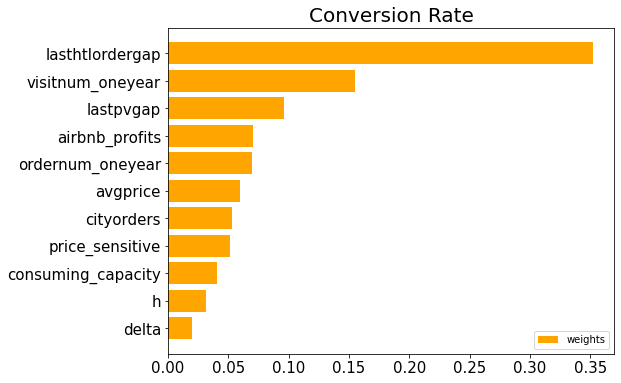

In [92]:
plt.figure(figsize=(8,6))
plt.barh(df_cr.index,df_cr.values[:,0],label='weights', color = 'orange')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.title('Conversion Rate',fontsize=20);

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
X_label = data.iloc[:,2:]

X_label

X_label = X_label.rename(columns={"ctrip_profits":"airbnb_profits"})
X_label

,consuming_capacity,price_sensitive,ordernum_oneyear,avgprice,airbnb_profits,lasthtlordergap,cityorders,lastpvgap,cr,visitnum_oneyear,h,delta
0,39.0,62.0,21.0,363.0,3.440,10475.0,1.987,7566.0,1.50,1265.0,17,2
1,26.0,8.0,7.0,307.0,1.413,18873.0,0.287,288.0,1.00,21926.0,7,21
2,96.0,25.0,33.0,1000.0,32.547,4616.0,1.207,614.0,1.52,2807.0,15,0
3,61.0,11.0,4.0,685.0,11.280,44830.0,0.040,7262.0,1.00,5584.0,11,15
4,27.0,33.0,7.0,407.0,1.073,5823.0,0.667,216.0,1.38,2328.0,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...
288042,23.0,28.0,2.0,226.0,0.667,170680.0,0.127,3802.0,1.00,3112.0,21,1
288043,58.0,11.0,4.0,461.0,1.387,528.0,2.213,528.0,1.21,1853.0,12,0
288044,20.0,10.0,5.0,193.0,0.387,63673.0,0.033,8692.0,1.24,1231.0,18,25
288045,25.0,4.0,1.0,258.0,0.187,125643.0,0.240,919.0,1.05,8378.0,8,24


In [22]:
Y_label = data.label
Y_label

0         0
1         0
2         0
3         0
4         1
         ..
288042    0
288043    1
288044    0
288045    0
288046    1
Name: label, Length: 288047, dtype: int64

In [95]:
clf_1 = RandomForestClassifier()
clf_1 = clf_1.fit(X_label,Y_label)

In [96]:
weights_label = clf_1.feature_importances_

In [97]:
weights_label

array([0.07278829, 0.07469235, 0.07154249, 0.08991047, 0.09839185,
       0.10491827, 0.09122211, 0.09929945, 0.08486049, 0.102351  ,
       0.06298856, 0.04703467])

In [98]:
df_label = pd.DataFrame(dict(zip(X_label.columns,weights_label)),index=['weights_label']).T.sort_values(by='weights_label')

In [99]:
df_label.values[:,0]

array([0.04703467, 0.06298856, 0.07154249, 0.07278829, 0.07469235,
       0.08486049, 0.08991047, 0.09122211, 0.09839185, 0.09929945,
       0.102351  , 0.10491827])

In [100]:
df_label.index

Index(['delta', 'h', 'ordernum_oneyear', 'consuming_capacity',
       'price_sensitive', 'cr', 'avgprice', 'cityorders', 'airbnb_profits',
       'lastpvgap', 'visitnum_oneyear', 'lasthtlordergap'],
      dtype='object')

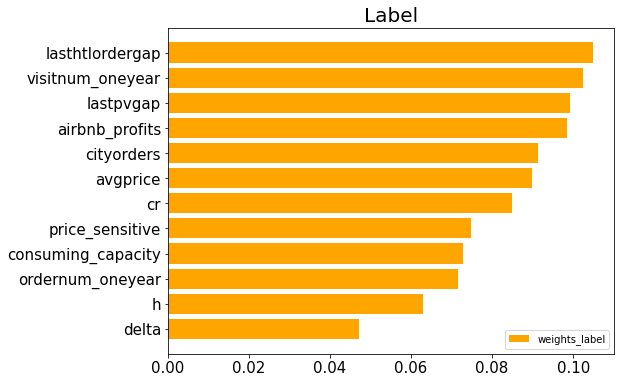

In [101]:
plt.figure(figsize=(8,6))
plt.barh(df_label.index,df_label.values[:,0],label='weights_label', color = 'orange')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.title('Label',fontsize=20);

In [30]:
pd.DataFrame({'R':'lasthtlordergap','F':'ordernum_oneyear','M':'avgprice'},index=['Model'])

,R,F,M
Model,lasthtlordergap,ordernum_oneyear,avgprice


In [31]:
rfm = data.loc[:,['sampleid','ordernum_oneyear','avgprice','lasthtlordergap']].rename(columns={'ordernum_oneyear':'F','avgprice':'M','lasthtlordergap':'R'})

rfm.head()

,sampleid,F,M,R
0,24650,21.0,363.0,10475.0
1,24653,7.0,307.0,18873.0
2,24658,33.0,1000.0,4616.0
3,24662,4.0,685.0,44830.0
4,24665,7.0,407.0,5823.0


## Using Kmeans to determine RFM Clusters

In [32]:
rfm_table = rfm
rfm_table = rfm_table.rename(columns={'F':'Frequency','M':'Monetary','R':'Recency'})
rfm_table

,sampleid,Frequency,Monetary,Recency
0,24650,21.0,363.0,10475.0
1,24653,7.0,307.0,18873.0
2,24658,33.0,1000.0,4616.0
3,24662,4.0,685.0,44830.0
4,24665,7.0,407.0,5823.0
...,...,...,...,...
288042,2238388,2.0,226.0,170680.0
288043,2238389,4.0,461.0,528.0
288044,2238396,5.0,193.0,63673.0
288045,2238397,1.0,258.0,125643.0


<ipython-input-33-9d160507b2df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_recency["clusters"] = kmeans.labels_
<ipython-input-33-9d160507b2df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_recency["clusters"] = kmeans.labels_
<ipython-input-33-9d160507b2df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

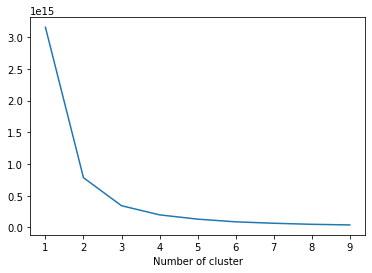

In [33]:
#Finding Optimum Clusters

sse={}
tx_recency = rfm_table[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

#### Function for ordering clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final
  
#Recency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_table[['Recency']])
rfm_table['RecencyCluster']=kmeans.predict(rfm_table[['Recency']])
rfm_table = order_cluster('RecencyCluster','Recency', rfm_table, False)

#Frequency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_table[['Frequency']])
rfm_table['FrequencyCluster']=kmeans.predict(rfm_table[['Frequency']])
rfm_table = order_cluster('FrequencyCluster','Frequency', rfm_table, True)

#Monetary Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_table[['Monetary']])
rfm_table['MonetaryCluster']=kmeans.predict(rfm_table[['Monetary']])
rfm_table = order_cluster('MonetaryCluster','Monetary', rfm_table, True)

# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Creating Recency Custer Tag Column
c=rfm_table.groupby('RecencyCluster')['Recency'].agg(['min','max','mean']).reset_index()
r1='<='+str(c.iloc[2,2]) 
r2=str(c.iloc[1,1])+' to '+str(c.iloc[1,2]) 
r3='>='+str(c.iloc[0,1])
# Create the dictionary 
R ={0 : r3, 1 : r2, 2 : r1} 
rfm_table['RecencyClusterTag']=rfm_table['RecencyCluster'].apply(set_value, args =(R, )) 

# Creating Frequency Custer Tag Column
a=rfm_table.groupby('FrequencyCluster')['Frequency'].agg(['min','max','mean']).reset_index()
f1='<='+str(a.iloc[0,2]) 
f2=str(a.iloc[1,1])+' to '+str(a.iloc[1,2]) 
f3='>='+str(a.iloc[2,1])
# Create the dictionary 
F ={0 : f1, 1 : f2, 2 :f3} 
rfm_table['FrequencyClusterTag']=rfm_table['FrequencyCluster'].apply(set_value, args =(F, )) 

# Creating Monetary Custer Tag Column
b=rfm_table.groupby('MonetaryCluster')['Monetary'].agg(['min','max','mean']).reset_index()
m1='<='+str(int(round(b.iloc[0,2]))) 
m2=str(int(round(b.iloc[0,2])+1))+' to '+str(int(round(b.iloc[1,2]))) 
m3='>='+str(int(round(b.iloc[1,2])+1))
# Create the dictionary 
M ={0 : m1, 1 : m2, 2 :m3} 
rfm_table['MonetaryClusterTag']=rfm_table['MonetaryCluster'].apply(set_value, args =(M, )) 

rfm_table["FrequencyClusterTag"] = rfm_table["FrequencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[f1, f2, f3]))
rfm_table["MonetaryClusterTag"] = rfm_table["MonetaryClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[m1, m2,m3]))
rfm_table["RecencyClusterTag"] = rfm_table["RecencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[r1, r2,r3]))


In [34]:
rfm_table

,sampleid,Frequency,Monetary,Recency,RecencyCluster,FrequencyCluster,MonetaryCluster,RecencyClusterTag,FrequencyClusterTag,MonetaryClusterTag
0,24650,21.0,363.0,10475.0,2,1,0,<=86494.0,15.0 to 39.0,<=392
1,24685,20.0,216.0,19628.0,2,1,0,<=86494.0,15.0 to 39.0,<=392
2,24752,24.0,310.0,26133.0,2,1,0,<=86494.0,15.0 to 39.0,<=392
3,24794,27.0,269.0,12184.0,2,1,0,<=86494.0,15.0 to 39.0,<=392
4,24797,18.0,300.0,5183.0,2,1,0,<=86494.0,15.0 to 39.0,<=392
...,...,...,...,...,...,...,...,...,...,...
288042,2223957,43.0,561.0,107087.0,1,2,1,86508.0 to 240876.0,>=40.0,393 to 752
288043,2231203,46.0,611.0,126868.0,1,2,1,86508.0 to 240876.0,>=40.0,393 to 752
288044,2231611,43.0,561.0,107087.0,1,2,1,86508.0 to 240876.0,>=40.0,393 to 752
288045,2234270,47.0,689.0,104128.0,1,2,1,86508.0 to 240876.0,>=40.0,393 to 752


In [35]:
FrequencyClusterTag = rfm_table.groupby("FrequencyClusterTag").aggregate({"FrequencyClusterTag":"count"})
FrequencyClusterTag['Percentage']=FrequencyClusterTag['FrequencyClusterTag']/FrequencyClusterTag['FrequencyClusterTag'].sum()
FrequencyClusterTag = FrequencyClusterTag.drop(['FrequencyClusterTag'], axis =1).reset_index(drop=False)
FrequencyClusterTag

,FrequencyClusterTag,Percentage
0,<=14.0,0.718407
1,15.0 to 39.0,0.220547
2,>=40.0,0.061046


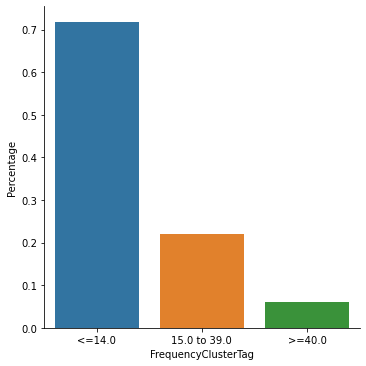

In [36]:
sns.catplot(x="FrequencyClusterTag", y="Percentage", kind="bar", data=FrequencyClusterTag)

In [37]:
RecencyClusterTag = rfm_table.groupby("RecencyClusterTag").aggregate({"RecencyClusterTag":"count"})
RecencyClusterTag['Percentage']=RecencyClusterTag['RecencyClusterTag']/RecencyClusterTag['RecencyClusterTag'].sum()
RecencyClusterTag = RecencyClusterTag.drop(['RecencyClusterTag'], axis =1).reset_index(drop=False)
RecencyClusterTag

,RecencyClusterTag,Percentage
0,<=86494.0,0.674300
1,86508.0 to 240876.0,0.217725
2,>=240912.0,0.107975


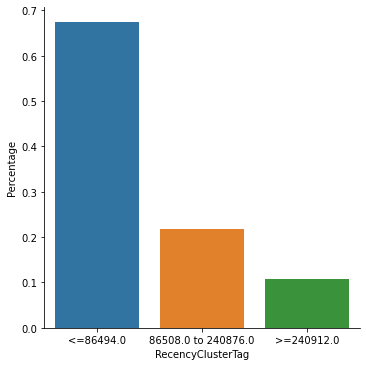

In [38]:
sns.catplot(x="RecencyClusterTag", y="Percentage", kind="bar", data=RecencyClusterTag)

In [39]:
MonetaryClusterTag = rfm_table.groupby("MonetaryClusterTag").aggregate({"MonetaryClusterTag":"count"})
MonetaryClusterTag['Percentage']=MonetaryClusterTag['MonetaryClusterTag']/MonetaryClusterTag['MonetaryClusterTag'].sum()
MonetaryClusterTag = MonetaryClusterTag.drop(['MonetaryClusterTag'], axis =1).reset_index(drop=False)
MonetaryClusterTag

,MonetaryClusterTag,Percentage
0,<=392,0.551271
1,393 to 752,0.346006
2,>=753,0.102723


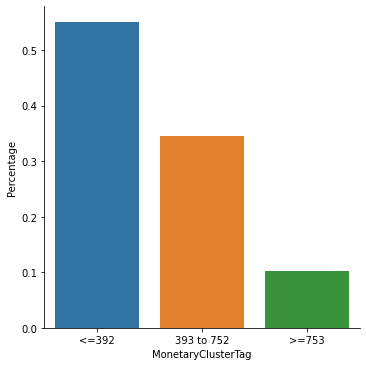

In [40]:
sns.catplot(x="MonetaryClusterTag", y="Percentage", kind="bar", data=MonetaryClusterTag)

In [41]:
#import matplotlib.pyplot as plt
 
#name_list = ['Monday','Tuesday','Friday','Sunday']
#num_list = [1.5,0.6,7.8,6]
#num_list1 = [1,2,3,1]
#plt.barh(range(len(num_list)), num_list,height=0.8, label='boy',fc = 'y')
#plt.barh(range(len(num_list)), num_list1, height=0.6,label='girl',tick_label = name_list,fc = 'r')
#plt.legend()
#plt.show()

## Using RandomForest to determine RFM bins

In [42]:
clf_rfm  = RandomForestRegressor()
clf_rfm = clf_rfm.fit(rfm[["F",'M','R']],y)

In [43]:
weights_rfm = clf_rfm.feature_importances_

In [44]:
weights_rfm

array([0.12941795, 0.25310792, 0.61747413])

In [45]:
df_rfm = pd.DataFrame(dict(zip(rfm.columns[1:],weights_rfm)),index=['weights']).T.sort_values(by='weights')
df_rfm
#df_rfm1 = list(df_rfm.weights.values)
#df_rfm1

,weights
F,0.129418
M,0.253108
R,0.617474


<Figure size 432x432 with 0 Axes>

findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


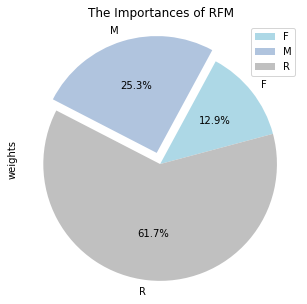

In [46]:
plt.figure(figsize=(6,6))
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
plot = df_rfm.plot.pie(y='weights', figsize=(5, 5), autopct='%1.1f%%', startangle=15, colors=my_colors, explode=my_explode)

plt.title('The Importances of RFM')
plt.axis('equal')

plt.show()
#plt.pie(df_rfm1,
#    explode=None,
#    labels=['F','M','R'],
#    autopct='%.2f%%');

In [47]:
rfm.describe().T

#f_bins = [0,3,16,711]
#m_bins = [8,246,544,6383]
#r_bins = [-1,14926,22313.00,527026.0]

,count,mean,std,min,25%,50%,75%,max
sampleid,288047.0,629367.158096,414585.157905,24650.0,313808.5,600798.0,887307.5,2238403.0
F,288047.0,12.543717,14.219524,1.0,3.0,7.0,16.0,87.0
M,288047.0,423.917076,247.968211,9.0,245.0,365.0,537.0,1506.0
R,288047.0,87653.802626,104695.141733,0.0,15136.0,44588.0,118593.0,474466.0


In [48]:
f_bins = [0,14,39,711]
m_bins = [8,396,759,6383]
r_bins = [-1,86494,240912,527026.0]

In [49]:
rfm['R_score'] = pd.cut(rfm['R'],r_bins,labels=[i for i in range(len(r_bins)-1,0,-1)])
rfm['F_score'] = pd.cut(rfm['F'],f_bins,labels=[i+1 for i in range(len(r_bins)-1)])
rfm['M_score'] = pd.cut(rfm['M'],m_bins,labels=[i+1 for i in range(len(r_bins)-1)])

In [50]:
rfm

,sampleid,F,M,R,R_score,F_score,M_score
0,24650,21.0,363.0,10475.0,3,2,1
1,24653,7.0,307.0,18873.0,3,1,1
2,24658,33.0,1000.0,4616.0,3,2,3
3,24662,4.0,685.0,44830.0,3,1,2
4,24665,7.0,407.0,5823.0,3,1,2
...,...,...,...,...,...,...,...
288042,2238388,2.0,226.0,170680.0,2,1,1
288043,2238389,4.0,461.0,528.0,3,1,2
288044,2238396,5.0,193.0,63673.0,3,1,1
288045,2238397,1.0,258.0,125643.0,2,1,1


In [51]:
rfm['R_score'] = pd.to_numeric(rfm['R_score'],errors='coerce')
rfm['F_score'] = pd.to_numeric(rfm['F_score'],errors='coerce')
rfm['M_score'] = pd.to_numeric(rfm['M_score'],errors='coerce')

In [52]:
rfm['rfm_score'] = rfm['R_score']*weights_rfm[2] + rfm['F_score']*weights_rfm[0] + rfm['M_score']*weights_rfm[1]

In [53]:
rfm['R_score'] = rfm['R_score'].astype(np.str)
rfm['F_score'] = rfm['F_score'].astype(np.str)
rfm['M_score'] = rfm['M_score'].astype(np.str)
rfm['rfm_group'] = rfm['R_score'].str.cat(rfm['F_score']).str.cat(rfm['M_score'])

<ipython-input-53-99223530e9e3>:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfm['R_score'] = rfm['R_score'].astype(np.str)
<ipython-input-53-99223530e9e3>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfm['F_score'] = rfm['F_score'].astype(np.str)
<ipython-input-53-99223530e9e3>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin 

In [54]:
rfm

,sampleid,F,M,R,R_score,F_score,M_score,rfm_score,rfm_group
0,24650,21.0,363.0,10475.0,3,2,1,2.364366,321
1,24653,7.0,307.0,18873.0,3,1,1,2.234948,311
2,24658,33.0,1000.0,4616.0,3,2,3,2.870582,323
3,24662,4.0,685.0,44830.0,3,1,2,2.488056,312
4,24665,7.0,407.0,5823.0,3,1,2,2.488056,312
...,...,...,...,...,...,...,...,...,...
288042,2238388,2.0,226.0,170680.0,2,1,1,1.617474,211
288043,2238389,4.0,461.0,528.0,3,1,2,2.488056,312
288044,2238396,5.0,193.0,63673.0,3,1,1,2.234948,311
288045,2238397,1.0,258.0,125643.0,2,1,1,1.617474,211


In [55]:
All = pd.merge(data.loc[:,['label','sampleid']],rfm,how='left',on='sampleid')
All

,label,sampleid,F,M,R,R_score,F_score,M_score,rfm_score,rfm_group
0,0,24650,21.0,363.0,10475.0,3,2,1,2.364366,321
1,0,24653,7.0,307.0,18873.0,3,1,1,2.234948,311
2,0,24658,33.0,1000.0,4616.0,3,2,3,2.870582,323
3,0,24662,4.0,685.0,44830.0,3,1,2,2.488056,312
4,1,24665,7.0,407.0,5823.0,3,1,2,2.488056,312
...,...,...,...,...,...,...,...,...,...,...
288042,0,2238388,2.0,226.0,170680.0,2,1,1,1.617474,211
288043,1,2238389,4.0,461.0,528.0,3,1,2,2.488056,312
288044,0,2238396,5.0,193.0,63673.0,3,1,1,2.234948,311
288045,0,2238397,1.0,258.0,125643.0,2,1,1,1.617474,211


In [56]:
data_display = All.groupby(['rfm_group','label'],as_index=False)['sampleid'].count()
data_display.head(5)

,rfm_group,label,sampleid
0,111,0,13508
1,111,1,3766
2,112,0,7970
3,112,1,2046
4,113,0,2451


In [57]:
data_score = All.groupby(['rfm_group','label'],as_index=False)['rfm_score'].sum()
data_score.head(5)

,rfm_group,label,rfm_score
0,111,0,13508.000000
1,111,1,3766.000000
2,112,0,9987.270156
3,112,1,2563.858813
4,113,0,3691.735045


In [58]:
data_display.columns = ['rfm_group','label','number']
data_display['rfm_group'] = data_display['rfm_group'].astype(np.int32)
data_display.head(5)

,rfm_group,label,number
0,111,0,13508
1,111,1,3766
2,112,0,7970
3,112,1,2046
4,113,0,2451


In [59]:
sns.color_palette("mako", as_cmap=True)

findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


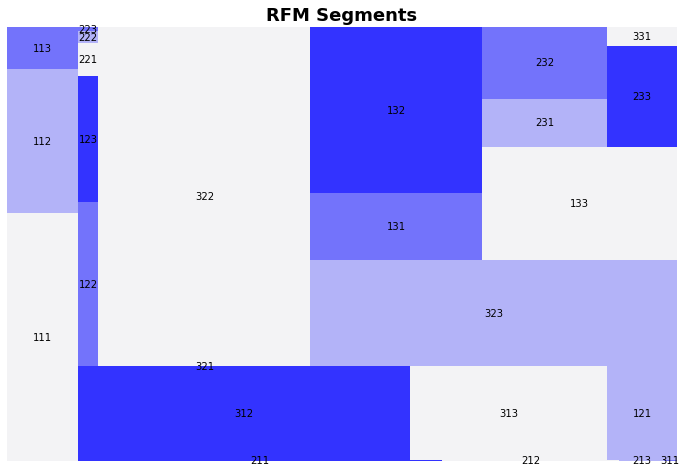

In [60]:
rfm_view= data_display.groupby('rfm_group').aggregate({"number":"sum"})

colors = sns.light_palette("blue", 4) 

#['steelblue','#9999ff','indianred','green','yellow','orange']

#Create our RFM Segment plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes=rfm_view['number'], 
              label=['111','112','113','211','212','213','311','312','313',
                     '121','122','123','221','222','223','321','322','323',
                     '131','132','133','231','232','233','331','332','333'],  color = colors, alpha=0.8 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [108]:
rfm_view= data_display.groupby('rfm_group').aggregate({"number":"sum"})
rfm_view.sort_values(by='number', ascending = False).head()

,number
rfm_group,
311,71187
312,38478
211,30929
321,28345
322,21795


In [61]:
data_score.columns = ['rfm_group','label','sum']
data_score['rfm_group'] = data_score['rfm_group'].astype(np.int32)
data_score.head()

,rfm_group,label,sum
0,111,0,13508.000000
1,111,1,3766.000000
2,112,0,9987.270156
3,112,1,2563.858813
4,113,0,3691.735045


In [62]:
data_score.to_excel('data_score.xlsx')

In [63]:
data_score_1=pd.read_excel('data_score.xlsx',index_col=0) 

number = (number_0 - number_1)*log(sum(rfm_score)_0/sum(rfm_score)_1)

In [64]:
rfm_group = data_display.rfm_group.drop_duplicates()

rfm_group = rfm_group.reset_index()

rfm_group['label']=-1

rfm_group.drop('index',axis=1,inplace=True)
rfm_group.head(5)

,rfm_group,label
0,111,-1
1,112,-1
2,113,-1
3,121,-1
4,122,-1


In [65]:
data_display.to_excel('data_display.xlsx')

In [66]:
#data_display_1 = pd.read_excel('data_display.xlsx',index_col=0)
data_display_1 = data_display
data_display_1.head()

,rfm_group,label,number
0,111,0,13508
1,111,1,3766
2,112,0,7970
3,112,1,2046
4,113,0,2451


In [67]:
data_display_1.rename(columns={'RFM_group':'rfm_group'},inplace=True)

number = (number_0 - number_1)*log(sum(rfm_score)_0/sum(rfm_score)_1)

In [68]:
data_display_1['number'] = data_display_1['number'].astype(np.int32)

In [69]:
data_score_1.head()

,rfm_group,label,sum
0,111,0,13508.000000
1,111,1,3766.000000
2,112,0,9987.270156
3,112,1,2563.858813
4,113,0,3691.735045


In [70]:
import pyecharts
print(pyecharts.__version__)
from pyecharts import Bar3D

0.1.9.4


In [71]:
data_display_1.head(5)

,rfm_group,label,number
0,111,0,13508
1,111,1,3766
2,112,0,7970
3,112,1,2046
4,113,0,2451


In [72]:
import math
data_merged = pd.merge(data_display_1,data_score_1,on=['rfm_group','label'])
data_merged.head()
data_merged
data_merged2 = data_merged[['rfm_group','label','sum','number']]
data_merged2.head()

,rfm_group,label,sum,number
0,111,0,13508.000000,13508
1,111,1,3766.000000,3766
2,112,0,9987.270156,7970
3,112,1,2563.858813,2046
4,113,0,3691.735045,2451


In [73]:
new_DataList =[d.tolist() for d in data_merged.values]

step3data=[]
index=0
while(index<len(new_DataList)):
    step3data.append(new_DataList[index][:3])
    index+=1
    step3data.append(new_DataList[index][:3])
    step3data.append([new_DataList[index][0],
                      new_DataList[index-1][1]+2,
                      #new_DataList[index-1][1]-new_DataList[index][1],
                      int((new_DataList[index-1][2]-new_DataList[index][2])*math.log10(new_DataList[index-1][3]/new_DataList[index][3]))
                     ])
    index+=1

data_final_1 = pd.DataFrame(step3data)
data_final_1 = data_final_1.rename(columns = {0:"rfm_group",1:"label",2:"number"})
data_final_1

,rfm_group,label,number
0,111.0,0.0,13508.0
1,111.0,1.0,3766.0
2,111.0,2.0,5403.0
3,112.0,0.0,7970.0
4,112.0,1.0,2046.0
...,...,...,...
70,332.0,1.0,3610.0
71,332.0,2.0,7.0
72,333.0,0.0,682.0
73,333.0,1.0,691.0


In [79]:
new_DataList =[d.tolist() for d in data_merged2.values]

step3data=[]
index=0
while(index<len(new_DataList)):
    step3data.append(new_DataList[index][:3])
    index+=1
    step3data.append(new_DataList[index][:3])
    step3data.append([new_DataList[index][0],
                      new_DataList[index-1][1]+2,
                      #new_DataList[index-1][1]-new_DataList[index][1],
                      int((new_DataList[index-1][2]-new_DataList[index][2])*math.log10(new_DataList[index-1][3]/new_DataList[index][3]))
                     ])
    index+=1

data_final_2 = pd.DataFrame(step3data)
data_final_2 = data_final_2.rename(columns = {0:"rfm_group",1:"label",2:"score"})
data_final_2

,rfm_group,label,score
0,111.0,0.0,13508.000000
1,111.0,1.0,3766.000000
2,111.0,2.0,5403.000000
3,112.0,0.0,9987.270156
4,112.0,1.0,2563.858813
...,...,...,...
70,332.0,1.0,9916.280393
71,332.0,2.0,20.000000
72,333.0,0.0,2046.000000
73,333.0,1.0,2073.000000


In [114]:
# Show 3D bar
bar3d1 = Bar3D("",  width=1300, height=600)

dic = {}
x_axis = [
    '111', "112", "113", "121", "122", "123", "131",'132',"133",
    "211", "212", "213", "221", "222", "223", "231",'232',"233",
    "311", "312", "313", "321", "322", "323", "331",'332',"333"
    ]
y_axis = [
    "Retention", "Churn"
    ]

for index in range(len(x_axis)):
    dic[x_axis[index]]=index
    
data1=[d.tolist() for d in data_display_1.values]

for index in range(len(data1)):
    data1[index][0]=dic[str(data1[index][0])]

range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d1.add(
    "rfm",
     x_axis,
    y_axis,
    data =data1,
    is_visualmap=True,
    visual_range=[0, data_display_1['number'].max()],
    visual_range_color=range_color,
    grid3d_width=1600,
    grid3d_height=80,
    grid3d_depth=1200
)
bar3d1.render()

In [115]:
#  Show 3D bar
bar3d2 = Bar3D("",  width=1300, height=600)

dic = {}
x_axis = [
    '111', "112", "113", "121", "122", "123", "131",'132',"133",
    "211", "212", "213", "221", "222", "223", "231",'232',"233",
    "311", "312", "313", "321", "322", "323", "331",'332',"333"
    ]
y_axis = [
    "Retention", "Churn"
    ]

for index in range(len(x_axis)):
    dic[x_axis[index]]=index
    
data2=[d.tolist() for d in data_score_1.values]
data2

for index in range(len(data2)):
    data2[index][0]=dic[str(int(data2[index][0]))]

range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d2.add(
    "rfm",
     x_axis,
    y_axis,
    data =data2,
    is_visualmap=True,
    visual_range=[0, data_score_1['sum'].max()],
    visual_range_color=range_color,
    grid3d_width=1600,
    grid3d_height=80,
    grid3d_depth=1200
)
bar3d2.render()

In [116]:
# Show 3D bar
bar3d3 = Bar3D("",  width=1300, height=600)

dic = {}
x_axis = [
    '111', "112", "113", "121", "122", "123", "131",'132',"133",
    "211", "212", "213", "221", "222", "223", "231",'232',"233",
    "311", "312", "313", "321", "322", "323", "331",'332',"333"
    ]
y_axis = [
    "Retention", "Churn","Retention/Churn"
    ]

for index in range(len(x_axis)):
    dic[x_axis[index]]=index
    
data3=[d.tolist() for d in data_final_1.values]

for index in range(len(data3)):
    data3[index][0]=dic[str(int(data3[index][0]))]

range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d3.add(
    "rfm",
     x_axis,
    y_axis,
    data =data3,
    is_visualmap=True,
    visual_range=[0, data_final_1['number'].max()],
    visual_range_color=range_color,
    grid3d_width=1600,
    grid3d_height=80,
    grid3d_depth=1200
)
bar3d3.render()

In [117]:
# Show 3D bar
bar3d4 = Bar3D("",  width=1300, height=600)

dic = {}
x_axis = [
    '111', "112", "113", "121", "122", "123", "131",'132',"133",
    "211", "212", "213", "221", "222", "223", "231",'232',"233",
    "311", "312", "313", "321", "322", "323", "331",'332',"333"
    ]
y_axis = [
    "Retention", "Churn","Retention/Churn"
    ]

for index in range(len(x_axis)):
    dic[x_axis[index]]=index
    
data4=[d.tolist() for d in data_final_2.values]

for index in range(len(data4)):
    data4[index][0]=dic[str(int(data4[index][0]))]

range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d4.add(
    "rfm",
     x_axis,
    y_axis,
    data =data4,
    is_visualmap=True,
    visual_range=[0, data_final_2['score'].max()],
    visual_range_color=range_color,
    grid3d_width=1600,
    grid3d_height=80,
    grid3d_depth=1200
)
bar3d4.render()